# Machine Learning 
## Support Vector Regression 3.6.24
### Group No: 5

#### Group Member
+ Coding Section
    - Mahfuz 罗尼 (Presenter)
    - Dong Bowen 董博文
    - Wang Yifan 王亦帆
    - JACOBO BUSUMABU
+ Theoretical Section 
    - Shi Jinsong 施劲松 (Presenter)
    - Li Cunhao 李存浩
    - Zhang Chaoyang 张朝阳
    - Liu Xuechun 刘雪纯



#### About the dataset
About House Price - india

train - 29451 rows, 12 columns

test - 68720 rows, 11 columns

In [50]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [1]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [2]:
train_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [3]:
test_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [4]:
train_df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [5]:
test_df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [6]:
# Select features and target
features = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)']
target = 'TARGET(PRICE_IN_LACS)'

X_train = train_df[features]
y_train = train_df[target]

In [8]:
# Display the first few rows of selected features and target
X_train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [9]:
y_train.head()

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

### Identify numerical and categorical columns

In [10]:
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

In [11]:
numerical_features

['UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'LONGITUDE',
 'LATITUDE',
 'TARGET(PRICE_IN_LACS)']

In [12]:
categorical_features

['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']

In [13]:
train_df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

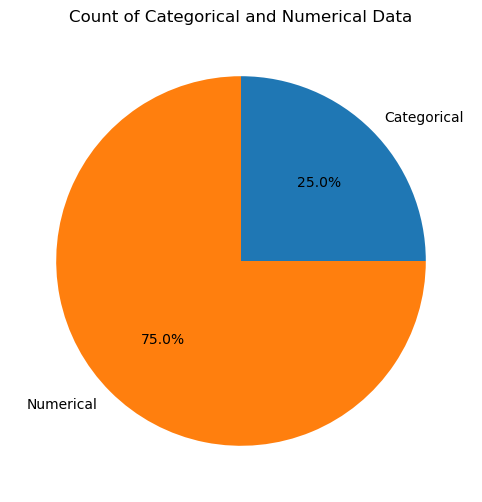

In [52]:
# Define categorical nad numerical data
import matplotlib.pyplot as plt
cateforical_count = len(categorical_features)
numerical_count = len(numerical_features)

#calculate total data points
total = cateforical_count + numerical_count

#calculate percentages
categorical_percent = (cateforical_count/total)*100
numerical_percent = (numerical_count/total)*100

plt.figure(figsize=(8,6))
plt.pie([categorical_percent, numerical_percent], labels=["Categorical", "Numerical"],autopct="%1.1f%%")
plt.title("Count of Categorical and Numerical Data")
plt.show()

In [48]:
train_df.isnull()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
test_df.isnull()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
68715,False,False,False,False,False,False,False,False,False,False,False
68716,False,False,False,False,False,False,False,False,False,False,False
68717,False,False,False,False,False,False,False,False,False,False,False
68718,False,False,False,False,False,False,False,False,False,False,False


### Encode categorical variable

In [16]:
# One-hot encode categorical features
train_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_features, drop_first=True)

# Align the test set with the training set
X_train, X_test = train_df.align(test_df, join='left', axis=1, fill_value=0)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Initializing the scalars
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#scaling the training features
X_train_scaled = scaler_X.fit_transform(X_train)

#preparing scaling the target variable
y_train = train_df['TARGET(PRICE_IN_LACS)']  
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

X_test_scaled = scaler_X.transform(X_test)


### Hyperparameter Tuning and Model Training
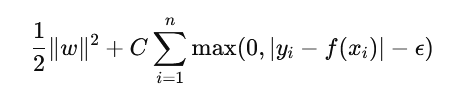

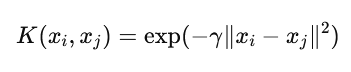

In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Simplified parameter grid
param_grid = {
    'C': [0.1, 1, 10],       #[0.1,1,10,100]       
    'epsilon': [0.1, 0.5],   #[0.01,0.1,1]
    'gamma': ['scale']       #[scale,auto]
}

In [19]:
# Use a smaller subset of data for initial parameter tuning
X_train_sample = X_train_scaled[:1000]
y_train_sample = y_train_scaled[:1000]

# Initialize the SVR model
svr = SVR(kernel='rbf')

# Perform GridSearchCV to find the best parameters with fewer folds and parallel processing
grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_sample, y_train_sample)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale'}


In [20]:
# Train the final SVR model using the best parameters
svr_best = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
svr_best.fit(X_train_scaled, y_train_scaled)


SVR(C=10)

### Evaluate the model and make Prediction

svr prediction function is 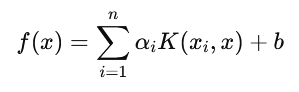
inverse transformatin 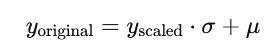

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Make predictions on the training set
y_train_pred_scaled = svr_best.predict(X_train_scaled)
y_train_pred_scaled = y_train_pred_scaled.reshape(-1, 1)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled).ravel()


In [24]:
# Make predictions on the test set
y_test_pred_scaled = svr_best.predict(X_test_scaled)
y_test_pred_scaled = y_test_pred_scaled.reshape(-1, 1)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled).ravel()


In [25]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


In [34]:
mse_train

57023.16742936459

In [35]:
r2_train

0.8678421201193722

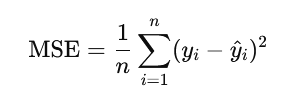   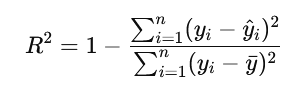

In [49]:
# Prepare the submission file using default range index
submission = pd.DataFrame({
    'Id': range(1, len(test_df) + 1),  
    'PRICE_IN_LACS': y_test_pred  
})
submission.to_csv('submission1.csv', index=False)

submission.head(15)

,Id,PRICE_IN_LACS
0,1,68.352087
1,2,11.311819
2,3,-39.331518
3,4,32.740031
4,5,-47.789771
5,6,80.016559
6,7,-45.580771
7,8,84.165818
8,9,-45.550782
9,10,30.965719


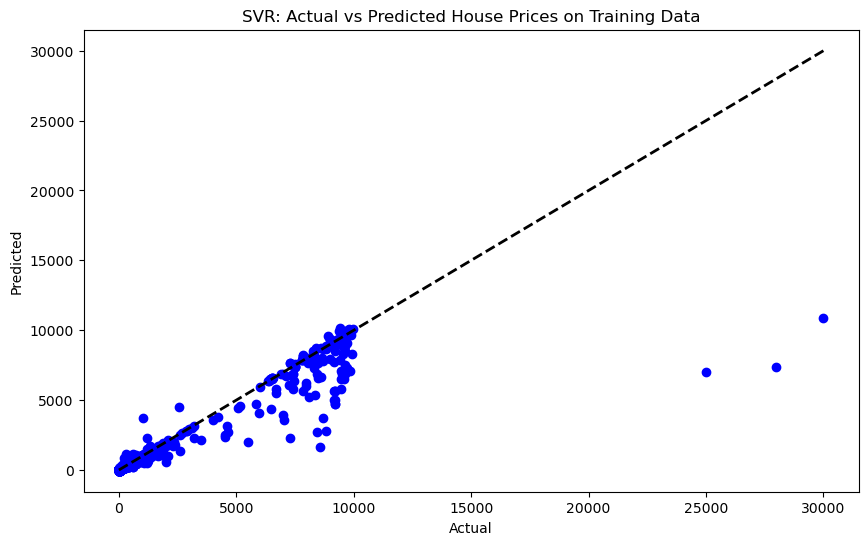

In [32]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) #diagonal line representing perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs Predicted House Prices on Training Data')
plt.show()


In [44]:
actual_vs_pred_train = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred
})

actual_vs_pred_train


,Actual,Predicted
0,55.0,120.819388
1,51.0,113.854313
2,43.0,66.871286
3,62.5,72.553939
4,60.5,21.478247
...,...,...
29446,45.0,97.044012
29447,16.0,81.430118
29448,27.1,17.284796
29449,67.0,75.994579


In [45]:
actual_vs_pred_train.head()

,Actual,Predicted
0,55.0,120.819388
1,51.0,113.854313
2,43.0,66.871286
3,62.5,72.553939
4,60.5,21.478247


In [40]:
sub = pd.read_csv('submission1.csv')

In [41]:
sub

,Id,PRICE_IN_LACS
0,1,68.352087
1,2,11.311819
2,3,-39.331518
3,4,32.740031
4,5,-47.789771
...,...,...
68715,68716,-2.756530
68716,68717,23.713487
68717,68718,16.456425
68718,68719,-40.851088
